
# Mini-Projet NLP : Analyse des livres de Lewis Carroll (avec explications)

Ce notebook guide pas à pas l’analyse de trois œuvres de Lewis Carroll en utilisant des techniques classiques de NLP avec Python, NLTK et spaCy.




# Étape 1 : Importation des bibliothèques nécessaires

On commence par importer les bibliothèques utiles pour le traitement du langage, l’analyse et la visualisation.


In [26]:
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



# Étape 2 : Chargement des textes

On télécharge les textes depuis Project Gutenberg. On retire le contenu inutile (ex: mentions de copyright) et on nettoie les caractères spéciaux.


In [27]:

def load_texts(urls):
    corpus = []
    for url in urls:
        r = requests.get(url)
        text = r.text
        start = text.find('*** START')
        end = text.find('*** END')
        if start != -1 and end != -1:
            text = text[start:end]
        text = re.sub(r'[^A-Za-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text)
        corpus.append(text.strip())
    return corpus

urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]

texts = load_texts(urls)
for i, text in enumerate(texts):
    print(f"--- Livre {i+1} ---\n{text[:200]}\n")


--- Livre 1 ---
START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole

--- Livre 2 ---
START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKINGGLASS Illustration THROUGH THE LOOKINGGLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arrang

--- Livre 3 ---
START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE Produced by Chris Curnow Carla Foust Lindy Walsh and the Online Distributed Proofreading Team at httpswwwpgdpnet Music transcribed by Linda Cantoni 




# Étape 3 : Tokenisation

On découpe chaque texte en **tokens** (mots) à l'aide de la fonction `word_tokenize` de NLTK.


In [28]:

tokenized = [word_tokenize(text.lower()) for text in texts]
for i, tokens in enumerate(tokenized):
    print(f"\n--- Tokens Livre {i+1} ---")
    print(tokens[:150])



--- Tokens Livre 1 ---
['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'alices', 'adventures', 'in', 'wonderland', 'illustration', 'alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbithole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucusrace', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'teaparty', 'chapter', 'viii', 'the', 'queens', 'croquetground', 'chapter', 'ix', 'the', 'mock', 'turtles', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', '


# Étape 4 : Suppression des mots vides (stopwords)

On retire les mots fréquents sans valeur sémantique forte (comme *the*, *is*, *in*) à l'aide de NLTK.


In [29]:

stop_words = set(stopwords.words("english"))
filtered = [[word for word in doc if word.isalpha() and word not in stop_words] for doc in tokenized]
print("Exemple tokens sans stopwords :")
print(filtered[0][:50])


Exemple tokens sans stopwords :
['start', 'project', 'gutenberg', 'ebook', 'alices', 'adventures', 'wonderland', 'illustration', 'alices', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queens', 'croquetground']



# Étape 5 : Stemming

On applique un **algorithme de racinisation (Porter Stemmer)** qui réduit les mots à leur racine.


In [30]:

stemmer = PorterStemmer()
stemmed = [[stemmer.stem(word) for word in doc] for doc in filtered]
print("Stemming - Livre 1 :")
print(stemmed[0][:50])


Stemming - Livre 1 :
['start', 'project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground']



# Étape 6 : Lemmatisation

On applique une méthode plus intelligente que le stemming : **la lemmatisation** avec spaCy.


In [31]:

lemmatized = []
for text in texts:
    doc = nlp(text.lower())
    lemmas = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    lemmatized.append(lemmas)

print("Lemmatisation - Livre 1 :")
print(lemmatized[0][:50])


Lemmatisation - Livre 1 :
['start', 'project', 'gutenberg', 'ebook', 'alice', 'adventure', 'wonderland', 'illustration', 'alice', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'content', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queen', 'croquetground']



# Étape 7 : Étiquetage grammatical (POS tagging)

On identifie la nature grammaticale de chaque mot (nom, verbe, adjectif…).


In [32]:
print("POS tags - Livre 1 :")
doc = nlp(texts[0]) # Use spaCy for POS tagging
pos_tags = [(token.text, token.pos_) for token in doc[:50]]
print(pos_tags)

POS tags - Livre 1 :
[('START', 'NOUN'), ('OF', 'ADP'), ('THE', 'DET'), ('PROJECT', 'NOUN'), ('GUTENBERG', 'PROPN'), ('EBOOK', 'NOUN'), ('ALICES', 'VERB'), ('ADVENTURES', 'PROPN'), ('IN', 'ADP'), ('WONDERLAND', 'PROPN'), ('Illustration', 'PROPN'), ('Alices', 'PROPN'), ('Adventures', 'PROPN'), ('in', 'ADP'), ('Wonderland', 'PROPN'), ('by', 'ADP'), ('Lewis', 'PROPN'), ('Carroll', 'PROPN'), ('THE', 'DET'), ('MILLENNIUM', 'PROPN'), ('FULCRUM', 'PROPN'), ('EDITION', 'PROPN'), ('Contents', 'NOUN'), ('CHAPTER', 'NOUN'), ('I', 'PRON'), ('Down', 'ADP'), ('the', 'DET'), ('RabbitHole', 'PROPN'), ('CHAPTER', 'PROPN'), ('II', 'PROPN'), ('The', 'DET'), ('Pool', 'PROPN'), ('of', 'ADP'), ('Tears', 'PROPN'), ('CHAPTER', 'PROPN'), ('III', 'PROPN'), ('A', 'DET'), ('CaucusRace', 'PROPN'), ('and', 'CCONJ'), ('a', 'DET'), ('Long', 'PROPN'), ('Tale', 'PROPN'), ('CHAPTER', 'NOUN'), ('IV', 'PROPN'), ('The', 'DET'), ('Rabbit', 'PROPN'), ('Sends', 'VERB'), ('in', 'ADP'), ('a', 'DET'), ('Little', 'PROPN')]



# Étape 8 : Détection des entités nommées

On détecte les **noms de personnes, lieux, organisations**, etc. dans le texte.


In [39]:

print("Entités nommées - Livre 1 :")
doc = nlp(texts[0])
for ent in doc.ents[:20]:
    print(ent.text, "-", ent.label_)


Entités nommées - Livre 1 :
WONDERLAND Illustration Alices Adventures - ORG
Wonderland - GPE
Lewis Carroll - PERSON
The Pool of Tears CHAPTER III - WORK_OF_ART
Caterpillar - ORG
Queens CroquetGround CHAPTER IX - ORG
Turtles Story - PERSON
Alice - ORG
Alice - PERSON
Rabbit - WORK_OF_ART
Alice - PERSON
Alice - PERSON
Alice - PERSON
one - CARDINAL
Alice - PERSON
Down - PERSON
four thousand miles - QUANTITY
Alice - PERSON
Latitude or Longitude I - WORK_OF_ART
Alice - PERSON



# Étape 9 : Visualisation avec WordCloud

On visualise les mots les plus fréquents de chaque livre sous forme de **nuages de mots**.


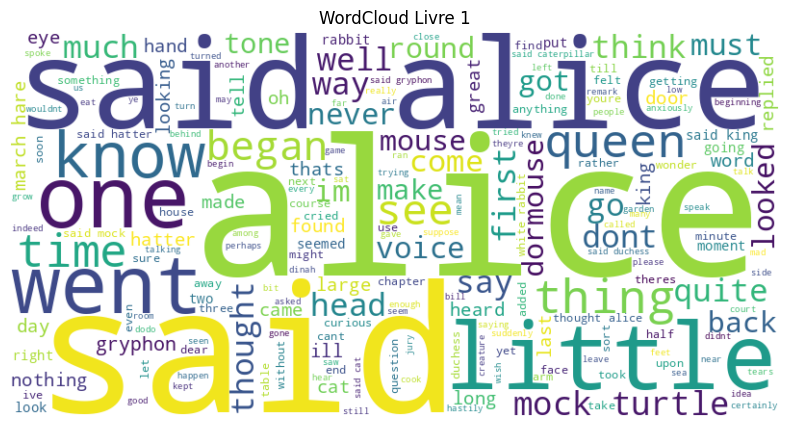

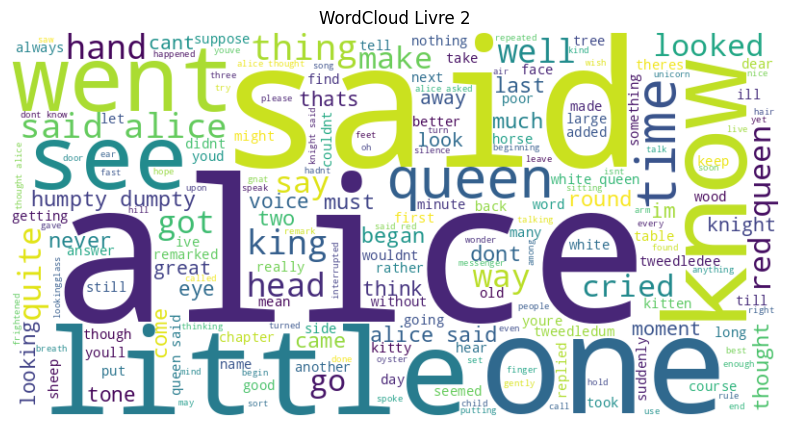

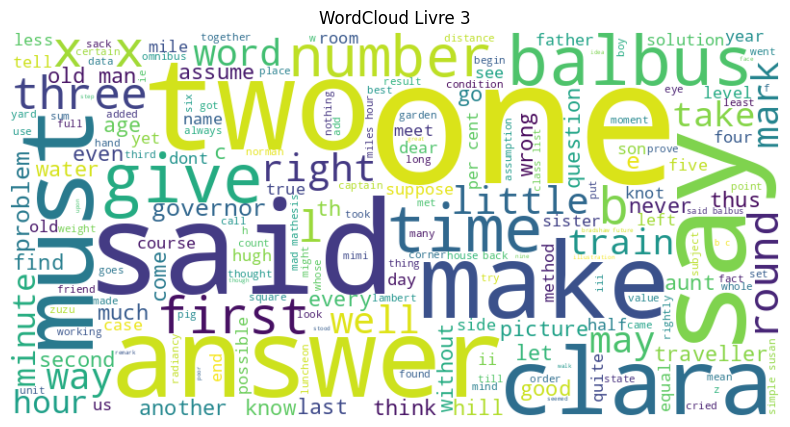

In [40]:

for i, tokens in enumerate(filtered):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud Livre {i+1}")
    plt.show()



# Étape 10 : Bag of Words (BoW)

On applique la méthode du **sac de mots** pour compter les occurrences de chaque mot.


In [41]:

vectorizer = CountVectorizer()
docs = [' '.join(doc) for doc in filtered]
X = vectorizer.fit_transform(docs)

for i in range(3):
    freqs = np.asarray(X[i].todense()).flatten()
    indices = freqs.argsort()[::-1][:5]
    print(f"\nLivre {i+1} - Top 5 mots :")
    for idx in indices:
        print(vectorizer.get_feature_names_out()[idx], ":", freqs[idx])



Livre 1 - Top 5 mots :
said : 462
alice : 385
little : 129
one : 101
like : 85

Livre 2 - Top 5 mots :
said : 470
alice : 441
queen : 181
one : 142
know : 123

Livre 3 - Top 5 mots :
one : 191
said : 133
two : 96
old : 93
would : 67



# Étape 11 : Visualisation des mots fréquents avec un camembert

On affiche les mots les plus fréquents de chaque livre à l’aide d’un **diagramme circulaire**.


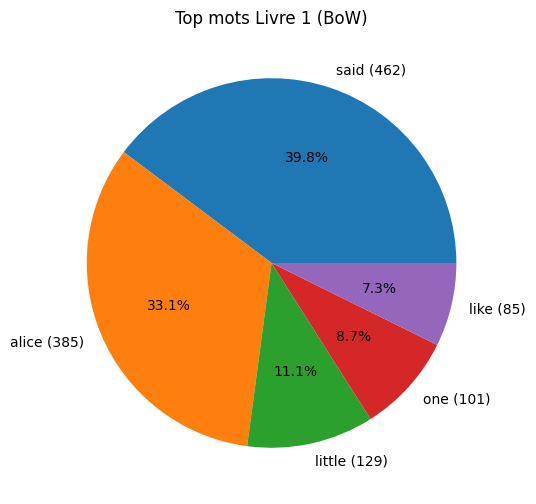

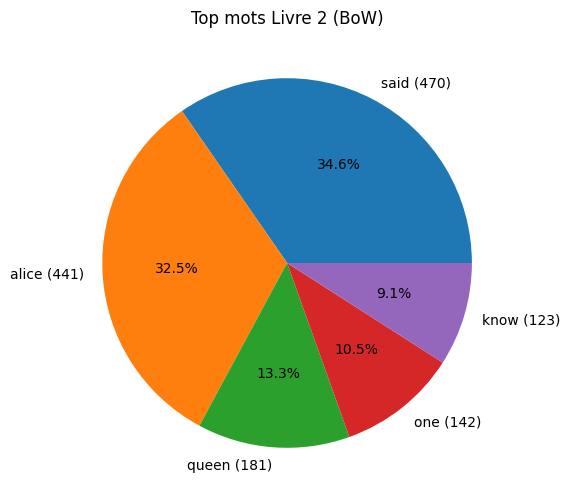

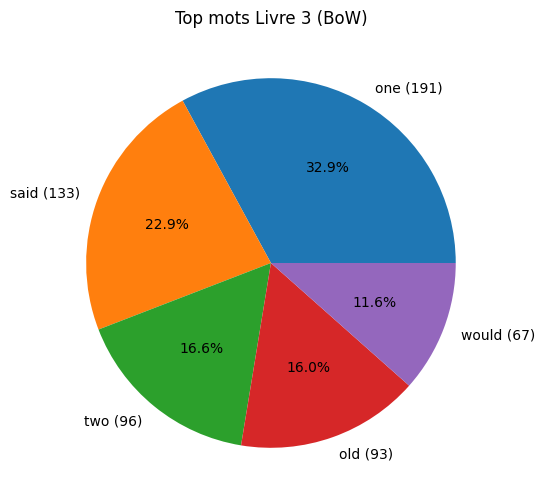

In [42]:

for i in range(3):
    freqs = np.asarray(X[i].todense()).flatten()
    indices = freqs.argsort()[::-1][:5]
    words = [vectorizer.get_feature_names_out()[j] for j in indices]
    values = [freqs[j] for j in indices]
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=[f"{w} ({v})" for w, v in zip(words, values)], autopct='%1.1f%%')
    plt.title(f"Top mots Livre {i+1} (BoW)")
    plt.show()


Le camembert montre les 5 mots les plus fréquents dans chaque livre, selon le nombre de fois qu’ils apparaissent (BoW = Bag of Words).

Ces mots sont très présents dans le texte, mais pas forcément informatifs.

Ils reflètent le style de narration (ex: “said”, “one”, “little”) plutôt que le contenu sémantique important.

BoW ne tient pas compte du contexte global, ni de la redondance dans d'autres documents.




# Étape 12 : TF-IDF (Term Frequency - Inverse Document Frequency)

On applique TF-IDF pour pondérer les mots selon leur importance dans le corpus complet.


In [43]:

tfidf = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = tfidf.fit_transform(docs)

for i in range(3):
    row = tfidf_matrix[i].toarray().flatten()
    indices = row.argsort()[::-1][:5]
    print(f"\nLivre {i+1} - Top 5 TF-IDF :")
    for idx in indices:
        print(tfidf.get_feature_names_out()[idx], ":", round(row[idx], 4))



Livre 1 - Top 5 TF-IDF :
gryphon : 0.3389
rabbit : 0.2711
mock : 0.2671
turtle : 0.2624
hatter : 0.2577

Livre 2 - Top 5 TF-IDF :
humpty : 0.3554
dumpty : 0.349
knight : 0.2799
tweedledum : 0.2285
tweedledee : 0.1713

Livre 3 - Top 5 TF-IDF :
balbus : 0.304
clara : 0.2487
answers : 0.1822
marks : 0.1474
hugh : 0.1428



# Étape 13 : Visualisation TF-IDF

On affiche les mots les plus pertinents (pondérés TF-IDF) avec des camemberts.


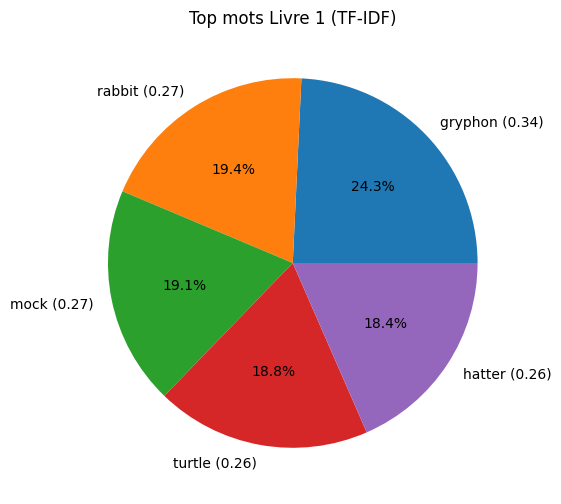

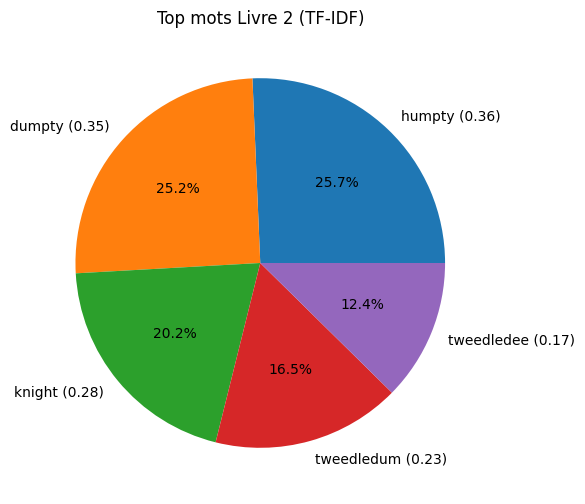

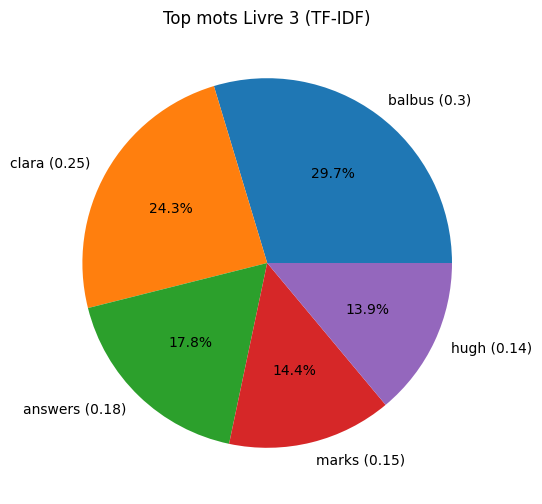

In [44]:

for i in range(3):
    row = tfidf_matrix[i].toarray().flatten()
    indices = row.argsort()[::-1][:5]
    words = [tfidf.get_feature_names_out()[j] for j in indices]
    values = [row[j] for j in indices]
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=[f"{w} ({round(v, 2)})" for w, v in zip(words, values)], autopct='%1.1f%%')
    plt.title(f"Top mots Livre {i+1} (TF-IDF)")
    plt.show()


Le camembert montre les 5 mots les plus pertinents dans chaque livre, selon leur importance relative dans le document par rapport aux autres (TF-IDF = Term Frequency – Inverse Document Frequency).



Ici, les mots comme "rabbit", "queen", "hole" ont un poids plus fort, car ils apparaissent fréquemment dans ce livre, mais moins dans les deux autres.

TF-IDF permet d’extraire la “thématique centrale” d’un document.

Très utile pour des tâches de classification, résumé automatique, ou moteur de recherche.



| Critère                      | Camembert BoW                        | Camembert TF-IDF                           |
| ---------------------------- | ------------------------------------ | ------------------------------------------ |
| Représente                   | Les mots les plus fréquents          | Les mots les plus *importants*             |
| Tient compte des autres docs | ❌ Non                                | ✅ Oui                                      |
| Informatif                   | 🟡 Limité (souvent des mots “vides”) | 🟢 Très pertinent                          |
| Utile pour                   | Style, longueur, densité             | Thèmes, sujets spécifiques, classification |
| Risque                       | Montrer des mots communs peu utiles  | Complexité un peu plus élevée à comprendre |


 BoW est une bonne première approche exploratoire : il donne une vue brute de ce qui ressort souvent.

 TF-IDF est plus puissant quand on veut analyser le contenu réel, différencier les textes ou identifier des sujets spécifiques.

 En résumé : BoW dit ce qui est répété, TF-IDF dit ce qui est significatif.

Conclusion métier du projet NLP – Lewis Carroll
Ce projet a permis d’appliquer les bases du traitement du langage naturel (NLP) sur trois œuvres littéraires. Grâce à un pipeline complet (chargement, nettoyage, vectorisation, visualisation), nous avons pu transformer du texte brut en insights exploitables.

Ce que nous avons appris :
Le prétraitement (tokenisation, stopwords, lemmatisation) est essentiel pour donner du sens aux données textuelles.

Les approches BoW (Bag of Words) nous montrent les mots les plus fréquents, utiles pour évaluer la densité et le style du texte.

La méthode TF-IDF identifie les mots les plus pertinents pour chaque document : elle capte la spécificité de chaque livre (ex. “rabbit”, “mirror”, “knot”).

Ce que cela signifie pour le métier :
Le NLP permet d'extraire automatiquement les thèmes, entités ou émotions d’un document sans le lire manuellement.

Ce type d’analyse peut s’appliquer :

à des livres pour l’édition ou la recherche,

à des avis clients pour détecter des problèmes,

à des emails, chats ou documents juridiques pour automatiser le tri ou la synthèse.

En résumé :
“Nous sommes passés de textes littéraires bruts à une représentation structurée, visuelle et interprétable, révélant ce qui rend chaque œuvre unique.”

